# **How do patterns of happpiness across different demographics change?**

 Name: Kechen Lu

 This report analyze patterns of happiness across different demographics by focusing on the questions below:

 1. Do kids and their parents find happiness in similar experiences?
 2. Does older people tend to be more talkative when expressing their feelings?  

## About data:

HappyDB is a corpus of 100,000 crowd-sourced happy moments via Amazon’s Mechanical Turk. https://arxiv.org/abs/1801.07746.

In [1]:
# Read data
import pandas as pd

demographic = pd.read_csv('demographic.csv')
moments = pd.read_csv('processed_moments.csv')

## Data cleaning and processing:



*   Checked missing value and decided to remove them for this analysis
*   Standerdized text

*   Categorized age group to bins for further analysis






In [3]:
# Merge data and check missing data
merged_df = pd.merge(moments, demographic, on='wid', how='left')
missing_values_summary = merged_df.isnull().sum()

# Convert age to numeric
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

# Check unique values
unique_genders = merged_df['gender'].unique()
unique_countries = merged_df['country'].unique()

(missing_values_summary, unique_genders, unique_countries)


(hmid                         0
 wid                          0
 reflection_period            0
 original_hm                  0
 cleaned_hm                   0
 modified                     0
 num_sentence                 0
 ground_truth_category    86285
 predicted_category           0
 id                           0
 text                         1
 age                         93
 country                    203
 gender                      79
 marital                    157
 parenthood                  78
 dtype: int64,
 array(['m', 'f', nan, 'o'], dtype=object),
 array(['USA', 'IND', 'DNK', 'VNM', 'KWT', 'PHL', 'GBR', 'FIN', 'AUS',
        'VEN', 'LTU', 'BGR', 'BGD', 'IDN', 'BEL', 'CAN', 'SGP', 'IRL',
        'PER', nan, 'PRT', 'URY', 'SRB', 'JAM', 'ITA', 'KEN', 'DOM', 'EGY',
        'ESP', 'NGA', 'BRA', 'MEX', 'ARM', 'PAK', 'TUR', 'MKD', 'FRA',
        'COL', 'GRC', 'MDA', 'POL', 'DZA', 'THA', 'ARE', 'UGA', 'MYS',
        'ZAF', 'AUT', 'DEU', 'LKA', 'NZL', 'ROU', 'ETH', 'PRI', 'RUS'

In [10]:
import pandas as pd

# Drop na value
cleaned_df = merged_df.dropna(subset=['age', 'country', 'gender', 'marital', 'parenthood'])

# Convert age to numeric
cleaned_df['age'] = pd.to_numeric(cleaned_df['age'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['age'])



<ipython-input-10-4bd735e4360a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['age'] = pd.to_numeric(cleaned_df['age'], errors='coerce')


(hmid                         0
 wid                          0
 reflection_period            0
 original_hm                  0
 cleaned_hm                   0
 modified                     0
 num_sentence                 0
 ground_truth_category    85811
 predicted_category           0
 id                           0
 text                         1
 age                          0
 country                      0
 gender                       0
 marital                      0
 parenthood                   0
 age_group                    0
 dtype: int64,
 {'Total Records': 99831,
  'Age Group Distribution': 26-35     51491
  36-45     18909
  19-25     18038
  46-55      6779
  56-65      3334
  66-233     1178
  0-18        102
  Name: age_group, dtype: int64,
  'Gender Distribution': m    57403
  f    41734
  o      694
  Name: gender, dtype: int64,
  'Country Distribution': USA    78618
  IND    16692
  VEN      588
  CAN      549
  GBR      361
  PHL      279
  MEX      150
  VNM    

In [15]:
# Categorize age groups, found that the largest value for age is 233, which is impossible for human life, so I decided to put a cap of 120 and only selected 0-120 for this matter.

#min(cleaned_df['age'])
#max(cleaned_df['age'])
bins = [0, 18, 35, 55, 233]
labels = ['0-18', '19-35', '36-55', '56-233']
cleaned_df = cleaned_df[cleaned_df['age'] <= 120]
cleaned_df['age_group'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=False)

# Fill na value
cleaned_df['gender'] = cleaned_df['gender'].fillna('unknown')

# Summary of the data
cleaned_data_summary = {
    'Total Records': cleaned_df.shape[0],
    'Age Group Distribution': cleaned_df['age_group'].value_counts(),
    'Gender Distribution': cleaned_df['gender'].value_counts(),
    'Country Distribution': cleaned_df['country'].value_counts().head(10)  # Top 10 countries
}

cleaned_data_summary


{'Total Records': 99831,
 'Age Group Distribution': 19-35     69529
 36-55     25688
 56-233     4512
 0-18        102
 Name: age_group, dtype: int64,
 'Gender Distribution': m    57403
 f    41734
 o      694
 Name: gender, dtype: int64,
 'Country Distribution': USA    78618
 IND    16692
 VEN      588
 CAN      549
 GBR      361
 PHL      279
 MEX      150
 VNM      125
 BRA      123
 AUS      117
 Name: country, dtype: int64}

## 1. Do kids and their parents find happiness in similar experiences? :
We define kids as anyone who are under 18, parents are more likely in their 30s and above thus our age group selection is 0-18, 36-55. Then use Word Clouds to visualize the most frequent words associated with happiness within these two groups to oberserve patterns.

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

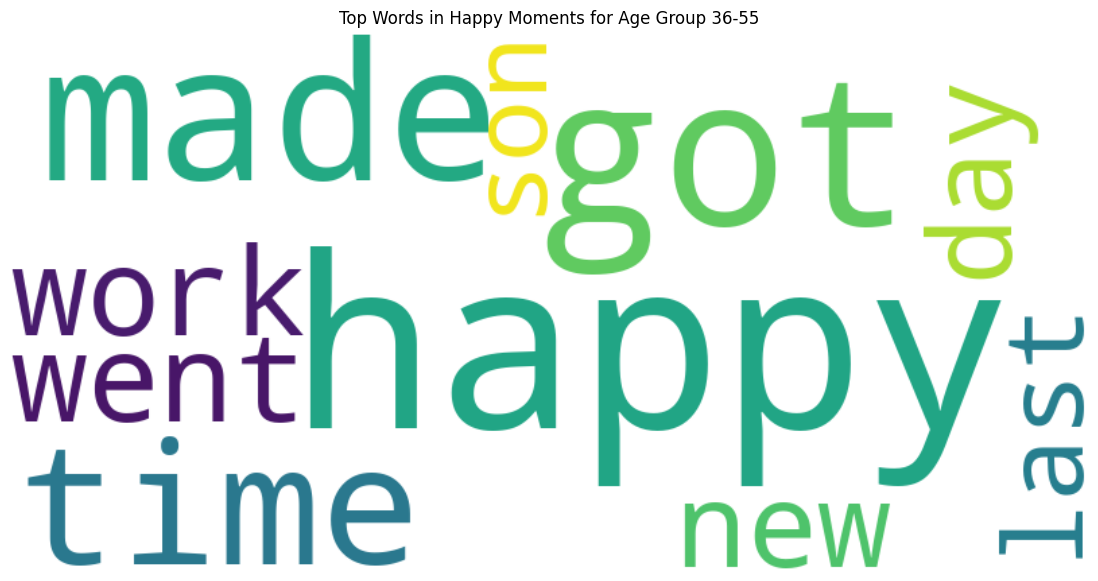

In [17]:
#nltk.download('punkt')
#nltk.download('stopwords')

# Set the stopwords
stop_words = set(stopwords.words('english'))

# Create a word frequency distribution
def word_freq_distribution(texts):
    word_freq = Counter()
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
        tokens = [word for word in tokens if not word in stop_words]
        word_freq.update(tokens)
    return word_freq

age_group_word_freq = {}
for group in labels:
    texts = cleaned_df[cleaned_df['age_group'] == group]['cleaned_hm'].dropna()
    age_group_word_freq[group] = word_freq_distribution(texts)

# Age 36-55
top_words_3655 = age_group_word_freq['36-55'].most_common(10)

# Plotting

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words_3655))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Happy Moments for Age Group 36-55')
plt.show()


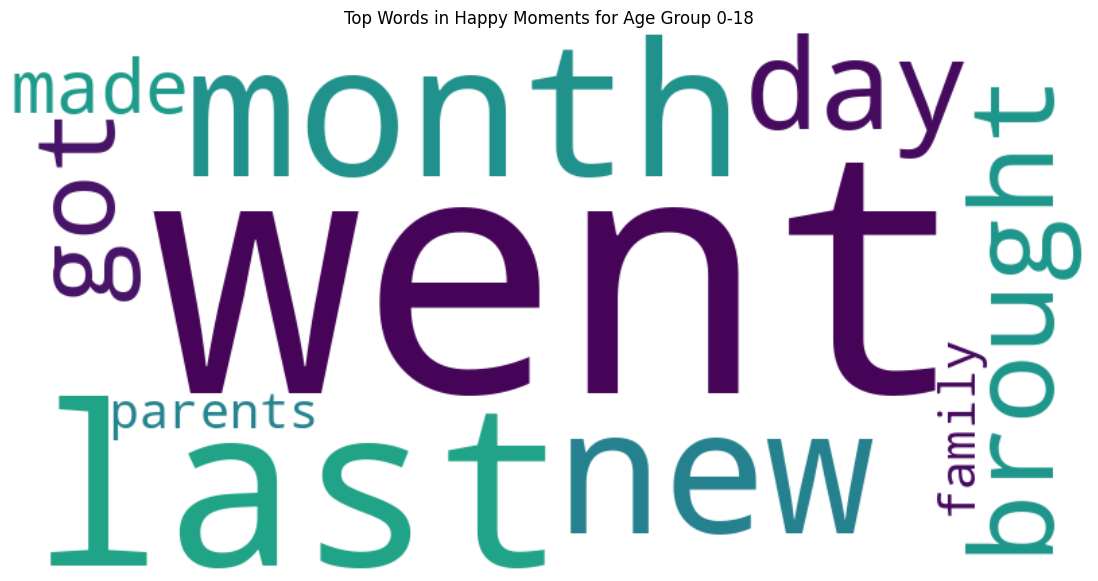

In [18]:
top_words_018 = age_group_word_freq['0-18'].most_common(10)

# Visualize the 0-18 age group
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words_018))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Happy Moments for Age Group 0-18')
plt.show()

 People frequently mention doing something when they talk about happy moments. **In the parents group**, the words "son", "made", "got" appears in the word cloud. the prominence of the word "son" suggests that family, and specifically children, play a significant role in their experiences of happiness."Got" relate to receiving something or achieving a goal and "made" might also reflect a sense of accomplishment. **In the kids group**, ""Went", "got", "family" stand out from the graph. "Went" stand out from them all, which might be associated with going somewhere, indicating travel, outings, or new experiences would make kids happiest.




## 2. Does older people tend to be more talkative when expressing their feelings?  

In [27]:
# Descriptive statistics
cleaned_df['text_length'] = cleaned_df['cleaned_hm'].apply(len)

age_group_descriptives = cleaned_df.groupby('age_group')['text_length'].describe()
age_group_descriptives

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-18,102.0,52.196078,43.967368,15.0,31.0,37.0,44.5,249.0
19-35,69529.0,93.088869,123.980083,6.0,44.0,67.0,104.0,6548.0
36-55,25688.0,91.248793,94.609697,8.0,48.0,70.0,105.0,6557.0
56-233,4512.0,100.773715,89.496788,9.0,51.0,77.0,117.0,1550.0


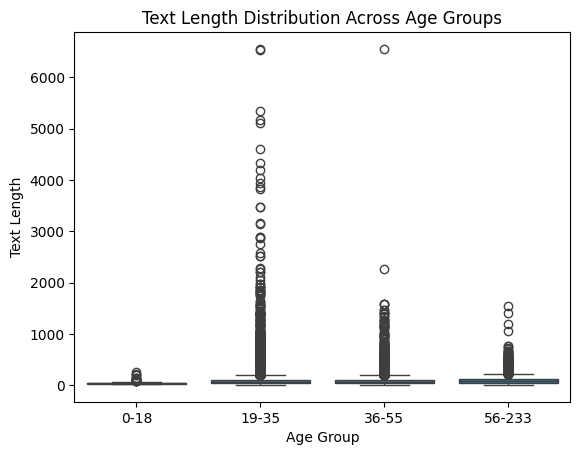

In [24]:
# Box plot to show the distribution of text length across age groups
sns.boxplot(x='age_group', y='text_length', data=cleaned_df)
plt.title('Text Length Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Text Length')
plt.show()



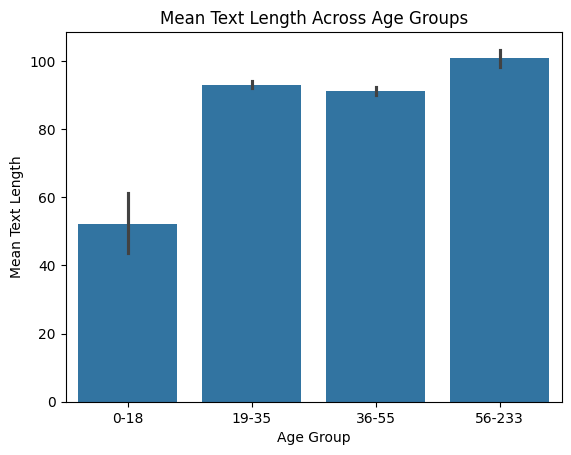

In [26]:
# Bar chart to compare the mean text length across age groups
import numpy as np
sns.barplot(x='age_group', y='text_length', data=cleaned_df, estimator=np.mean)
plt.title('Mean Text Length Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean Text Length')
plt.show()


Both the descriptive statistics and the box plot visualization suggest that there is an increase in the mean text length as age increases, which suggest that people are becoming more talktative in terms of sharing their feelings/moments as they are older. However, the box plot reveals a great number of outliers, particularly for the 19-35 and 36-55 age groups, where the longest texts are much longer than the majority of the data points. This indicates that while the average text length is greater for older individuals, there are still many younger individuals who express their happiness in considerable detail

# Conclusion:


1. **Do teenagers get excited about the same things as their parents?**
It seems like teenagers and adults find their happiness in different places. The words we saw popping up for teenagers were about going out and exploring, like travel or hanging out with friends. For parents, it was more about kids and accomplishment, this shows us that what you're into and what makes you happy can change as you move through life.
2.   **Are older people more detailed when they talk about what makes them happy?**
Yep, it looks like they are! The charts we made show us that as people get older, they tend to express more when they're describing a happy moment. Older folks, especially those above 55, write longer descriptions, which could mean they're sharing more about their experiences or feelings. However, even in the younger groups, there are some people who write a lot too. So, while being older might make you more likely to share feelings more, it's not a rule that applies to everyone.

In the end, our look at all these happy moments tells us that happiness is a personal thing and can come from many different places. Whether it's a quiet moment with family or an adventure in the great outdoors, what makes us happy can change as we grow older. But no matter the age, everyone has their own special things that bring them joy!